# MSDS 599 FINAL PROJECT - UFC DATA ANLYSIS
JoelleMarie Yonzon

Possible questions to explore:
<br>
What kind of fighters are in the UFC?
<br>
Do Red and Blue corners fight differently?
<br>
How can we predict wins in the UFC?

# IMPORT FILES AND TOOLS

In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [506]:
ufc =pd.read_csv('UFC_Data.csv')
ufc

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [507]:
ufc.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)

# I. CLEANING

KD: # of knockdowns
<br>
SIG_STR: # of significant strikes 'landed of attempted'
<br>
TOTAL_STR: total strikes 'landed of attempted'
<br>
TD: # of takedowns
<br>
PASS: # times the guard was passed
<br>
SUB: # of submissions attempted
<br>
REV: the # of Reversals landed
<br>
HEAD: # of significant strinks to the head 'landed of attempted'
<br>
BODY: # of significant strikes to the body 'landed of attempted'
<br>
CLINCH: # of significant strikes in the clinch 'landed of attempted'
<br>
GROUND: # of significant strikes on the ground 'landed of attempted'
<br>
DATE: the date of the fight
<br>
STANCE: the stance of the fighter (orthodox, southpaw, etc.)
<br>
WEIGHT_CLASS: which weight class the fight: in (Bantamweight, heavyweight, Women's flyweight, etc.)


In [508]:
# SINCE THERE ARE 6012 ROWS OF DATA, I WILL DROP NAN ROWS
ufc_clean = ufc.dropna(axis = 0, how = 'any')
ufc_clean.reset_index(drop=True, inplace=True)
ufc_clean.isnull().values.any()

False

In [509]:
ufc_clean.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.000,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.000,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
3,Leonardo Santos,Grant Dawson,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.000,...,2,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0
4,Song Kenan,Max Griffin,Keith Peterson,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.125,...,1,3,0,0,Orthodox,182.88,180.34,170.0,35.0,31.0


In [510]:
ufc_clean = ufc_clean[ufc_clean['Winner'] != 'Draw']
ufc_clean.Winner.value_counts()

Red     2397
Blue    1424
Name: Winner, dtype: int64

In [511]:
columns = ufc_clean.columns.values.tolist()
columns

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'B_avg_REV',
 'B_avg_opp_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_opp_SIG_STR_att',
 'B_avg_opp_SIG_STR_landed',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_avg_opp_TOTAL_STR_att',
 'B_avg_opp_TOTAL_STR_landed',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_opp_TD_att',
 'B_avg_opp_TD_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_lande

In [512]:
# ORGANIZE BLUE CORNER
ufc_b = ufc_clean.loc[:,(ufc_clean.columns.str[0:2] == 'B_') | (ufc_clean.columns.str[0:2] != 'R_')]
ufc_b.insert(1, 'Corner', 'Blue')
ufc_b2 = ufc_b.copy()
ufc_b2['Winner'] = ufc_b2.loc[:,'Winner'].replace({'Red':int(0),'Blue':int(1)})
# ufc_b2.columns = list(map(lambda col: col.replace('B_', ''), ufc_b2.columns.str[2:]))
ufc_b2.columns = ufc_b2.columns.str[2:]
ufc_b2.rename(columns = {'rner': 'corner', 'nner':'winner','tle_bout':'title_bout','ight_class':'weight_class'}, inplace = True)
# ufc_b2.columns = ufc_b2.columns.str.replace('B_', '')
ufc_b2.drop(['feree','cation','te'], axis = 1,inplace = True)
ufc_b2

,fighter,corner,winner,title_bout,weight_class,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Gustavo Lopez,Blue,0,False,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,...,0,0,0,1,0,Orthodox,165.10,170.18,135.0,31.0
1,Roman Dolidze,Blue,0,False,Middleweight,0.500000,0.000,0.660000,0.305000,0.300000,...,1,0,1,0,0,Orthodox,187.96,193.04,205.0,32.0
2,Macy Chiasson,Blue,1,False,WomenBantamweight,0.125000,0.000,0.535625,0.578750,0.185000,...,0,1,2,1,0,Orthodox,180.34,182.88,135.0,29.0
3,Grant Dawson,Blue,1,False,Lightweight,0.000000,0.000,0.515000,0.473750,0.435000,...,0,2,0,2,0,Switch,177.80,182.88,145.0,27.0
4,Max Griffin,Blue,1,False,Welterweight,0.046875,0.125,0.459277,0.404687,0.322188,...,0,1,2,0,0,Orthodox,180.34,193.04,170.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,Evan Tanner,Blue,0,True,LightHeavyweight,0.000000,0.000,0.737500,0.475000,1.000000,...,0,0,2,1,0,Orthodox,182.88,187.96,185.0,30.0
3886,Jeff Monson,Blue,0,False,Middleweight,0.000000,0.000,0.500000,0.350000,0.250000,...,0,1,0,0,0,Orthodox,175.26,187.96,247.0,29.0
3887,Wanderlei Silva,Blue,0,True,LightHeavyweight,0.500000,0.500,0.640000,0.665000,0.000000,...,0,0,1,0,0,Orthodox,180.34,187.96,205.0,23.0
3888,Chuck Liddell,Blue,0,False,Middleweight,0.000000,0.000,0.460000,0.230000,1.000000,...,0,1,0,0,0,Orthodox,187.96,193.04,205.0,29.0


In [513]:
# ORGANIZE RED CORNER
ufc_r = ufc_clean.loc[:,(ufc_clean.columns.str[0:2] == 'R_') | (ufc_clean.columns.str[0:2] != 'B_')]
ufc_r.insert(1, 'Corner', 'Red')
ufc_r2 = ufc_r.copy()
ufc_r2['Winner'] = ufc_r2.loc[:,'Winner'].replace({'Red':int(1),'Blue':int(0)})
ufc_r2.columns = ufc_r2.columns.str[2:]
ufc_r2.rename(columns = {'rner': 'corner', 'nner':'winner','tle_bout':'title_bout','ight_class':'weight_class'}, inplace = True)
ufc_r2.drop(['feree','cation','te'], axis = 1, inplace = True)
ufc_r2

,fighter,corner,winner,title_bout,weight_class,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Adrian Yanez,Red,1,False,Bantamweight,1.00000,0.000000,0.500000,0.460000,0.000000,...,0,0,1,0,0,Orthodox,170.18,177.80,135.0,27.0
1,Trevin Giles,Red,1,False,Middleweight,1.03125,0.062500,0.576875,0.381250,0.406250,...,1,0,3,0,0,Orthodox,182.88,187.96,185.0,28.0
2,Marion Reneau,Red,0,False,WomenBantamweight,0.00000,0.000977,0.403076,0.554961,0.511719,...,0,1,2,2,0,Orthodox,167.64,172.72,135.0,43.0
3,Leonardo Santos,Red,0,False,Lightweight,0.31250,0.015625,0.565156,0.343594,0.337031,...,1,2,2,2,0,Orthodox,182.88,190.50,155.0,41.0
4,Song Kenan,Red,0,False,Welterweight,0.62500,0.000000,0.493125,0.430000,0.000000,...,0,1,3,0,0,Orthodox,182.88,180.34,170.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,Tito Ortiz,Red,1,True,LightHeavyweight,0.25000,0.500000,0.579531,0.447500,0.857812,...,0,1,2,1,1,Orthodox,190.50,187.96,205.0,26.0
3886,Chuck Liddell,Red,1,False,Middleweight,0.00000,0.000000,0.470000,0.592500,0.250000,...,0,1,0,0,1,Orthodox,187.96,193.04,205.0,30.0
3887,Tito Ortiz,Red,1,True,LightHeavyweight,0.00000,0.000000,0.418125,0.420000,0.771250,...,0,0,2,0,1,Orthodox,190.50,187.96,205.0,25.0
3888,Jeremy Horn,Red,1,False,Middleweight,0.00000,0.000000,0.580000,0.635000,0.250000,...,0,0,0,0,0,Orthodox,185.42,187.96,185.0,23.0


In [514]:
ufc_b2.isnull().values.any()

False

In [515]:
ufc_r2.isnull().values.any()

False

In [516]:
ufc_r2.reset_index(drop=True, inplace=True)
ufc_b2.reset_index(drop=True, inplace=True)

In [517]:
# COMBINE RED AND BLUE CORNERS
ufc = pd.concat([ufc_r2, ufc_b2], axis = 0)
ufc

,fighter,corner,winner,title_bout,weight_class,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Adrian Yanez,Red,1,False,Bantamweight,1.00000,0.000000,0.500000,0.460000,0.000000,...,0,0,1,0,0,Orthodox,170.18,177.80,135.0,27.0
1,Trevin Giles,Red,1,False,Middleweight,1.03125,0.062500,0.576875,0.381250,0.406250,...,1,0,3,0,0,Orthodox,182.88,187.96,185.0,28.0
2,Marion Reneau,Red,0,False,WomenBantamweight,0.00000,0.000977,0.403076,0.554961,0.511719,...,0,1,2,2,0,Orthodox,167.64,172.72,135.0,43.0
3,Leonardo Santos,Red,0,False,Lightweight,0.31250,0.015625,0.565156,0.343594,0.337031,...,1,2,2,2,0,Orthodox,182.88,190.50,155.0,41.0
4,Song Kenan,Red,0,False,Welterweight,0.62500,0.000000,0.493125,0.430000,0.000000,...,0,1,3,0,0,Orthodox,182.88,180.34,170.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,Evan Tanner,Blue,0,True,LightHeavyweight,0.00000,0.000000,0.737500,0.475000,1.000000,...,0,0,2,1,0,Orthodox,182.88,187.96,185.0,30.0
3817,Jeff Monson,Blue,0,False,Middleweight,0.00000,0.000000,0.500000,0.350000,0.250000,...,0,1,0,0,0,Orthodox,175.26,187.96,247.0,29.0
3818,Wanderlei Silva,Blue,0,True,LightHeavyweight,0.50000,0.500000,0.640000,0.665000,0.000000,...,0,0,1,0,0,Orthodox,180.34,187.96,205.0,23.0
3819,Chuck Liddell,Blue,0,False,Middleweight,0.00000,0.000000,0.460000,0.230000,1.000000,...,0,1,0,0,0,Orthodox,187.96,193.04,205.0,29.0


In [518]:
ufc.isnull().values.any()

False

In [519]:
ufc.dtypes

fighter          object
corner           object
winner            int64
title_bout         bool
weight_class     object
                 ...   
Stance           object
Height_cms      float64
Reach_cms       float64
Weight_lbs      float64
age             float64
Length: 73, dtype: object

In [520]:
ufc.apply(pd.to_numeric, errors='ignore')
ufc['title_bout'] = ufc['title_bout'].astype('bool').astype('int')
ufc['winner'] = ufc['winner'].astype('bool').astype('int')
ufc.dtypes

fighter          object
corner           object
winner            int32
title_bout        int32
weight_class     object
                 ...   
Stance           object
Height_cms      float64
Reach_cms       float64
Weight_lbs      float64
age             float64
Length: 73, dtype: object

# EXPLORATORY ANALYSIS

In [521]:
Red = ufc[(ufc.corner.str.find('Red')!= -1)]
Red.winner.value_counts()
Red

,fighter,corner,winner,title_bout,weight_class,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Adrian Yanez,Red,1,0,Bantamweight,1.00000,0.000000,0.500000,0.460000,0.000000,...,0,0,1,0,0,Orthodox,170.18,177.80,135.0,27.0
1,Trevin Giles,Red,1,0,Middleweight,1.03125,0.062500,0.576875,0.381250,0.406250,...,1,0,3,0,0,Orthodox,182.88,187.96,185.0,28.0
2,Marion Reneau,Red,0,0,WomenBantamweight,0.00000,0.000977,0.403076,0.554961,0.511719,...,0,1,2,2,0,Orthodox,167.64,172.72,135.0,43.0
3,Leonardo Santos,Red,0,0,Lightweight,0.31250,0.015625,0.565156,0.343594,0.337031,...,1,2,2,2,0,Orthodox,182.88,190.50,155.0,41.0
4,Song Kenan,Red,0,0,Welterweight,0.62500,0.000000,0.493125,0.430000,0.000000,...,0,1,3,0,0,Orthodox,182.88,180.34,170.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,Tito Ortiz,Red,1,1,LightHeavyweight,0.25000,0.500000,0.579531,0.447500,0.857812,...,0,1,2,1,1,Orthodox,190.50,187.96,205.0,26.0
3817,Chuck Liddell,Red,1,0,Middleweight,0.00000,0.000000,0.470000,0.592500,0.250000,...,0,1,0,0,1,Orthodox,187.96,193.04,205.0,30.0
3818,Tito Ortiz,Red,1,1,LightHeavyweight,0.00000,0.000000,0.418125,0.420000,0.771250,...,0,0,2,0,1,Orthodox,190.50,187.96,205.0,25.0
3819,Jeremy Horn,Red,1,0,Middleweight,0.00000,0.000000,0.580000,0.635000,0.250000,...,0,0,0,0,0,Orthodox,185.42,187.96,185.0,23.0


In [522]:
Blue = ufc[(ufc.corner.str.find('Blue')!= -1)]
Blue.winner.value_counts()
Blue

,fighter,corner,winner,title_bout,weight_class,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Gustavo Lopez,Blue,0,0,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,...,0,0,0,1,0,Orthodox,165.10,170.18,135.0,31.0
1,Roman Dolidze,Blue,0,0,Middleweight,0.500000,0.000,0.660000,0.305000,0.300000,...,1,0,1,0,0,Orthodox,187.96,193.04,205.0,32.0
2,Macy Chiasson,Blue,1,0,WomenBantamweight,0.125000,0.000,0.535625,0.578750,0.185000,...,0,1,2,1,0,Orthodox,180.34,182.88,135.0,29.0
3,Grant Dawson,Blue,1,0,Lightweight,0.000000,0.000,0.515000,0.473750,0.435000,...,0,2,0,2,0,Switch,177.80,182.88,145.0,27.0
4,Max Griffin,Blue,1,0,Welterweight,0.046875,0.125,0.459277,0.404687,0.322188,...,0,1,2,0,0,Orthodox,180.34,193.04,170.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,Evan Tanner,Blue,0,1,LightHeavyweight,0.000000,0.000,0.737500,0.475000,1.000000,...,0,0,2,1,0,Orthodox,182.88,187.96,185.0,30.0
3817,Jeff Monson,Blue,0,0,Middleweight,0.000000,0.000,0.500000,0.350000,0.250000,...,0,1,0,0,0,Orthodox,175.26,187.96,247.0,29.0
3818,Wanderlei Silva,Blue,0,1,LightHeavyweight,0.500000,0.500,0.640000,0.665000,0.000000,...,0,0,1,0,0,Orthodox,180.34,187.96,205.0,23.0
3819,Chuck Liddell,Blue,0,0,Middleweight,0.000000,0.000,0.460000,0.230000,1.000000,...,0,1,0,0,0,Orthodox,187.96,193.04,205.0,29.0


In [523]:
# GET RELEVANT STATS FOR ONE FIGHTER
ufc.head()
stats = ufc.loc[:,'fighter':'longest_win_streak']
stats.drop(stats.columns[[0, 3, 4]], axis=1, inplace=True)
stats.drop(stats.loc[:,'total_rounds_fought':'longest_win_streak'], axis=1, inplace=True)
stats = pd.get_dummies(stats,columns=['corner'])
stats = stats[stats.columns.drop(list(stats.filter(regex='opp')))]
stats = stats[stats.columns.drop(list(stats.filter(regex='landed')))]
stats = stats[stats.columns.drop(list(stats.filter(regex='DISTANCE')))]
stats = stats[stats.columns.drop(list(stats.filter(regex='GROUND')))]
stats

,winner,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_REV,avg_SIG_STR_att,avg_TOTAL_STR_att,avg_TD_att,avg_HEAD_att,avg_BODY_att,avg_LEG_att,avg_CLINCH_att,avg_CTRL_time(seconds),total_time_fought(seconds),corner_Blue,corner_Red
0,1,1.00000,0.500000,0.000000,0.000000,0.00000,34.000000,35.000000,0.000000,32.000000,2.000000,0.000000,1.000000,5.000000,166.000000,0,1
1,1,1.03125,0.576875,0.406250,0.250000,0.37500,77.562500,93.125000,1.281250,71.093750,4.687500,1.781250,6.968750,176.156250,747.343750,0,1
2,0,0.00000,0.403076,0.511719,0.231445,0.03125,109.331055,137.154297,2.261719,86.375000,17.272461,5.683594,18.996094,141.285156,874.380859,0,1
3,0,0.31250,0.565156,0.337031,0.039062,0.00000,78.929688,110.914062,1.406250,65.195312,9.609375,4.125000,6.234375,59.031250,649.304688,0,1
4,0,0.62500,0.493125,0.000000,0.000000,0.25000,73.812500,77.562500,0.000000,56.562500,11.375000,5.875000,5.375000,13.500000,445.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,0,0.00000,0.737500,1.000000,1.250000,0.00000,37.250000,46.000000,1.000000,24.500000,8.750000,4.000000,9.250000,125.500000,312.750000,1,0
3817,0,0.00000,0.500000,0.250000,0.000000,0.00000,62.000000,160.000000,4.000000,49.000000,12.000000,1.000000,6.000000,423.000000,600.000000,1,0
3818,0,0.50000,0.640000,0.000000,0.000000,0.00000,17.000000,20.500000,0.000000,9.000000,7.000000,1.000000,14.500000,0.000000,108.500000,1,0
3819,0,0.00000,0.460000,1.000000,0.000000,0.00000,98.000000,117.000000,2.000000,47.000000,9.000000,42.000000,36.000000,0.000000,720.000000,1,0


In [524]:
collist = ufc.columns.tolist()
collist

['fighter',
 'corner',
 'winner',
 'title_bout',
 'weight_class',
 'avg_KD',
 'avg_opp_KD',
 'avg_SIG_STR_pct',
 'avg_opp_SIG_STR_pct',
 'avg_TD_pct',
 'avg_opp_TD_pct',
 'avg_SUB_ATT',
 'avg_opp_SUB_ATT',
 'avg_REV',
 'avg_opp_REV',
 'avg_SIG_STR_att',
 'avg_SIG_STR_landed',
 'avg_opp_SIG_STR_att',
 'avg_opp_SIG_STR_landed',
 'avg_TOTAL_STR_att',
 'avg_TOTAL_STR_landed',
 'avg_opp_TOTAL_STR_att',
 'avg_opp_TOTAL_STR_landed',
 'avg_TD_att',
 'avg_TD_landed',
 'avg_opp_TD_att',
 'avg_opp_TD_landed',
 'avg_HEAD_att',
 'avg_HEAD_landed',
 'avg_opp_HEAD_att',
 'avg_opp_HEAD_landed',
 'avg_BODY_att',
 'avg_BODY_landed',
 'avg_opp_BODY_att',
 'avg_opp_BODY_landed',
 'avg_LEG_att',
 'avg_LEG_landed',
 'avg_opp_LEG_att',
 'avg_opp_LEG_landed',
 'avg_DISTANCE_att',
 'avg_DISTANCE_landed',
 'avg_opp_DISTANCE_att',
 'avg_opp_DISTANCE_landed',
 'avg_CLINCH_att',
 'avg_CLINCH_landed',
 'avg_opp_CLINCH_att',
 'avg_opp_CLINCH_landed',
 'avg_GROUND_att',
 'avg_GROUND_landed',
 'avg_opp_GROUND_att',
 '

In [525]:
# GET RELEVANT STATS FOR EACH FIGHT
ufc.head()
statsa = ufc.loc[:,'fighter':'longest_win_streak']
statsa.drop(statsa.columns[[0, 3, 4]], axis=1, inplace=True)
statsa.drop(statsa.loc[:,'total_rounds_fought':'longest_win_streak'], axis=1, inplace=True)
statsa = pd.get_dummies(statsa,columns=['corner'])
statsall = statsa
statsall = statsa[statsa.columns.drop(list(statsall.filter(regex='landed')))]
statsall = statsall[statsall.columns.drop(list(statsall.filter(regex='DISTANCE')))]
statsall = statsall[statsall.columns.drop(list(statsall.filter(regex='GROUND')))]
statsall

,winner,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,avg_opp_TD_pct,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,...,avg_opp_BODY_att,avg_LEG_att,avg_opp_LEG_att,avg_CLINCH_att,avg_opp_CLINCH_att,avg_CTRL_time(seconds),avg_opp_CTRL_time(seconds),total_time_fought(seconds),corner_Blue,corner_Red
0,1,1.00000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.00000,0.00000,...,2.000000,0.000000,0.00000,1.000000,1.0000,5.000000,54.000000,166.000000,0,1
1,1,1.03125,0.062500,0.576875,0.381250,0.406250,0.116250,0.250000,1.18750,0.37500,...,9.093750,1.781250,9.65625,6.968750,5.0000,176.156250,154.687500,747.343750,0,1
2,0,0.00000,0.000977,0.403076,0.554961,0.511719,0.628750,0.231445,0.03125,0.03125,...,37.717773,5.683594,16.90332,18.996094,35.3125,141.285156,310.152344,874.380859,0,1
3,0,0.31250,0.015625,0.565156,0.343594,0.337031,0.048906,0.039062,0.00000,0.00000,...,16.726562,4.125000,7.12500,6.234375,3.8750,59.031250,193.546875,649.304688,0,1
4,0,0.62500,0.000000,0.493125,0.430000,0.000000,0.687500,0.000000,0.25000,0.25000,...,5.562500,5.875000,3.93750,5.375000,4.5000,13.500000,92.437500,445.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,0,0.00000,0.000000,0.737500,0.475000,1.000000,0.250000,1.250000,0.00000,0.00000,...,0.250000,4.000000,0.00000,9.250000,2.7500,125.500000,0.000000,312.750000,1,0
3817,0,0.00000,0.000000,0.500000,0.350000,0.250000,0.000000,0.000000,0.00000,0.00000,...,0.000000,1.000000,0.00000,6.000000,1.0000,423.000000,97.000000,600.000000,1,0
3818,0,0.50000,0.500000,0.640000,0.665000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.500000,1.000000,0.50000,14.500000,2.5000,0.000000,0.000000,108.500000,1,0
3819,0,0.00000,0.000000,0.460000,0.230000,1.000000,1.000000,0.000000,0.00000,0.00000,...,0.000000,42.000000,1.00000,36.000000,12.0000,0.000000,0.000000,720.000000,1,0


In [526]:
statsall.columns

Index(['winner', 'avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct',
       'avg_opp_SIG_STR_pct', 'avg_TD_pct', 'avg_opp_TD_pct', 'avg_SUB_ATT',
       'avg_opp_SUB_ATT', 'avg_REV', 'avg_opp_REV', 'avg_SIG_STR_att',
       'avg_opp_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_opp_TOTAL_STR_att',
       'avg_TD_att', 'avg_opp_TD_att', 'avg_HEAD_att', 'avg_opp_HEAD_att',
       'avg_BODY_att', 'avg_opp_BODY_att', 'avg_LEG_att', 'avg_opp_LEG_att',
       'avg_CLINCH_att', 'avg_opp_CLINCH_att', 'avg_CTRL_time(seconds)',
       'avg_opp_CTRL_time(seconds)', 'total_time_fought(seconds)',
       'corner_Blue', 'corner_Red'],
      dtype='object')

In [527]:
# LOGREG DOESN'T LIKE PARENTHESES
statsall = statsall.rename(columns = {'avg_opp_CTRL_time(seconds)':'avg_opp_CTRL_time','avg_CTRL_time(seconds)':'avg_CTRL_time','total_time_fought(seconds)':'total_time_fought'})

In [528]:
statsall.columns

Index(['winner', 'avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct',
       'avg_opp_SIG_STR_pct', 'avg_TD_pct', 'avg_opp_TD_pct', 'avg_SUB_ATT',
       'avg_opp_SUB_ATT', 'avg_REV', 'avg_opp_REV', 'avg_SIG_STR_att',
       'avg_opp_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_opp_TOTAL_STR_att',
       'avg_TD_att', 'avg_opp_TD_att', 'avg_HEAD_att', 'avg_opp_HEAD_att',
       'avg_BODY_att', 'avg_opp_BODY_att', 'avg_LEG_att', 'avg_opp_LEG_att',
       'avg_CLINCH_att', 'avg_opp_CLINCH_att', 'avg_CTRL_time',
       'avg_opp_CTRL_time', 'total_time_fought', 'corner_Blue', 'corner_Red'],
      dtype='object')

In [529]:
ufc.groupby('corner')['winner'].sum()

corner
Blue    1424
Red     2397
Name: winner, dtype: int32

In [530]:
ufc['winner'].value_counts()

1    3821
0    3821
Name: winner, dtype: int64

In [531]:
ufc.Stance.value_counts()

Orthodox       5756
Southpaw       1616
Switch          256
Open Stance      14
Name: Stance, dtype: int64

In [532]:
ufc.fighter.value_counts()

Jim Miller          32
Donald Cerrone      31
Demian Maia         30
Rafael Dos Anjos    29
Diego Sanchez       28
                    ..
Kai Kamaka           1
Darren Uyenoyama     1
Jacob Kilburn        1
Yuri Villefort       1
Darrick Minner       1
Name: fighter, Length: 1341, dtype: int64

In [533]:
ufc.title_bout.value_counts()

0    7154
1     488
Name: title_bout, dtype: int64

In [534]:
ufc['Stance'].value_counts()

Orthodox       5756
Southpaw       1616
Switch          256
Open Stance      14
Name: Stance, dtype: int64

In [535]:
ufc['age'].mean()

30.02394661083486

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

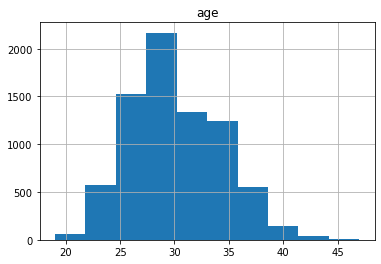

In [536]:
ufc.hist(column='age')

array([[<AxesSubplot:title={'center':'Reach_cms'}>]], dtype=object)

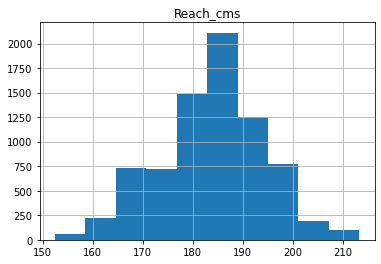

In [537]:
ufc.hist(column='Reach_cms')

# II. FIGHTER TYPE ANALYSIS

What type of fighters are there in the UFC? 

We will use 2 principal components for simplicity and visualization.

In [538]:
scaler=StandardScaler().fit(stats)
stats_scaled=scaler.transform(stats)

In [539]:
pca = PCA(2).fit_transform(stats_scaled)
temp=PCA(2).fit(stats_scaled)

In [540]:
comp = temp.components_
list1 = comp.tolist()
list1

[[0.02375445381419958,
  -0.060007708768411425,
  -0.05871122901604745,
  0.022891665931536815,
  -0.06367170421460026,
  -0.0051314968819844535,
  0.4330230635100149,
  0.43893753081179493,
  0.13433388257245535,
  0.40682061477379666,
  0.3547278673083987,
  0.28735481968814963,
  0.24511597699615145,
  0.10625264821976031,
  0.3771818700331121,
  -0.03175947887486164,
  0.03175947887486163],
 [0.07709124033679442,
  -0.23102553497129227,
  0.15620809696153484,
  0.4155952554981179,
  0.31121003826718807,
  0.21912378809704053,
  -0.14501035785721794,
  0.0036822578744222655,
  0.44865314232528736,
  -0.13455480480387166,
  -0.10647281401284084,
  -0.12070735516091902,
  0.04337714353781625,
  0.5399719882727712,
  0.15831845529121238,
  -0.0831800765027736,
  0.08318007650277366]]

Essentially, there are two types of fighters in the UFC: standing fighters (strikers) and ground fighters (grapplers).

In [541]:
pca.shape

(7642, 2)

In [542]:
stats_feat = pd.DataFrame(stats_scaled, index=stats.index, columns=stats.columns)
cols = stats_feat.columns.tolist()
cols

['winner',
 'avg_KD',
 'avg_SIG_STR_pct',
 'avg_TD_pct',
 'avg_SUB_ATT',
 'avg_REV',
 'avg_SIG_STR_att',
 'avg_TOTAL_STR_att',
 'avg_TD_att',
 'avg_HEAD_att',
 'avg_BODY_att',
 'avg_LEG_att',
 'avg_CLINCH_att',
 'avg_CTRL_time(seconds)',
 'total_time_fought(seconds)',
 'corner_Blue',
 'corner_Red']

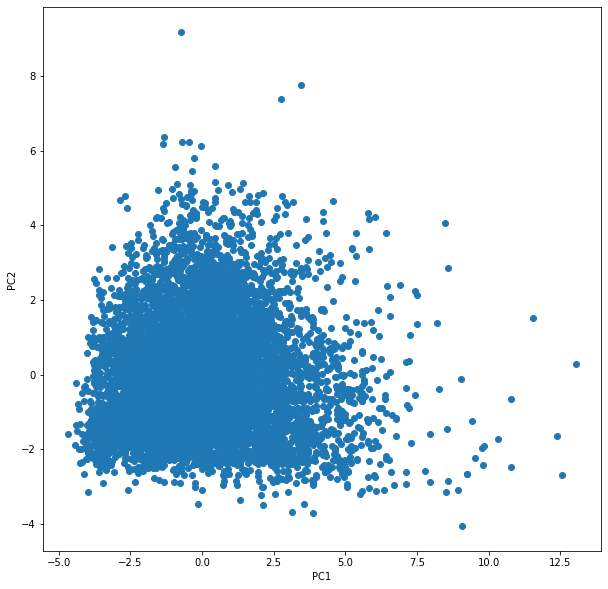

In [543]:
## SCALED
fig, ax = plt.subplots(figsize=(10,10))
xx=pca[:,0]
yy=pca[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2');

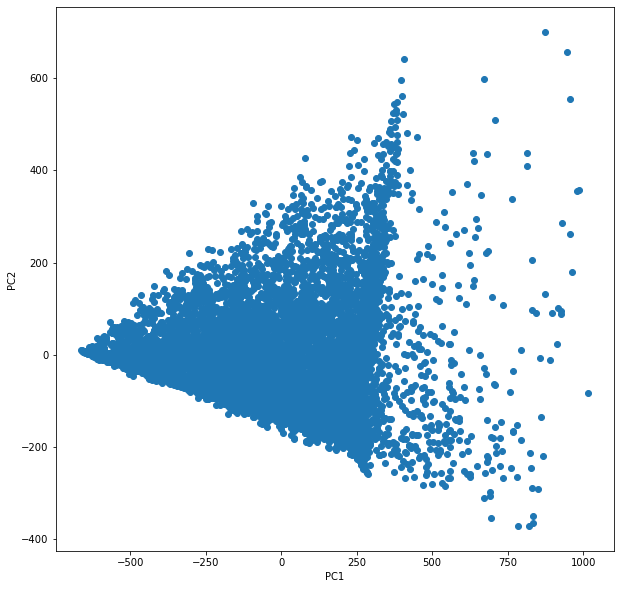

In [544]:
## NOT SCALED
pca2 = PCA(2).fit_transform(stats)
temp=PCA(2).fit(stats)
fig, ax = plt.subplots(figsize=(10,10))
xx2=pca2[:,0]
yy2=pca2[:,1]
ax.scatter(xx2,yy2)
plt.xlabel('PC1')
plt.ylabel('PC2');

What types of fighters are in the Red and Blue Corners? Is there a difference?

In [545]:
# PC OF RED CORNER
rstats = Red.loc[:,'fighter':'longest_win_streak']
rstats.drop(rstats.columns[[0, 1, 3, 4]], axis=1, inplace=True)
rstats.drop(rstats.loc[:,'total_rounds_fought':'longest_win_streak'], axis=1, inplace=True)
rstats = rstats[rstats.columns.drop(list(rstats.filter(regex='opp')))]
rstats = rstats[rstats.columns.drop(list(rstats.filter(regex='landed')))]
rstats = rstats[rstats.columns.drop(list(rstats.filter(regex='DISTANCE')))]
rstats = rstats[rstats.columns.drop(list(rstats.filter(regex='GROUND')))]
rstats

,winner,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_REV,avg_SIG_STR_att,avg_TOTAL_STR_att,avg_TD_att,avg_HEAD_att,avg_BODY_att,avg_LEG_att,avg_CLINCH_att,avg_CTRL_time(seconds),total_time_fought(seconds)
0,1,1.00000,0.500000,0.000000,0.000000,0.00000,34.000000,35.000000,0.000000,32.000000,2.000000,0.000000,1.000000,5.000000,166.000000
1,1,1.03125,0.576875,0.406250,0.250000,0.37500,77.562500,93.125000,1.281250,71.093750,4.687500,1.781250,6.968750,176.156250,747.343750
2,0,0.00000,0.403076,0.511719,0.231445,0.03125,109.331055,137.154297,2.261719,86.375000,17.272461,5.683594,18.996094,141.285156,874.380859
3,0,0.31250,0.565156,0.337031,0.039062,0.00000,78.929688,110.914062,1.406250,65.195312,9.609375,4.125000,6.234375,59.031250,649.304688
4,0,0.62500,0.493125,0.000000,0.000000,0.25000,73.812500,77.562500,0.000000,56.562500,11.375000,5.875000,5.375000,13.500000,445.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,1,0.25000,0.579531,0.857812,1.000000,0.00000,36.671875,87.437500,4.187500,35.187500,1.359375,0.125000,2.375000,454.625000,645.578125
3817,1,0.00000,0.470000,0.250000,0.000000,0.25000,44.500000,63.750000,0.500000,31.000000,2.750000,10.750000,15.500000,62.000000,476.500000
3818,1,0.00000,0.418125,0.771250,0.000000,0.00000,59.687500,106.750000,6.750000,55.750000,3.437500,0.500000,8.500000,475.500000,858.312500
3819,1,0.00000,0.580000,0.250000,0.000000,0.00000,15.000000,35.500000,5.000000,10.000000,2.500000,2.500000,2.500000,0.000000,597.500000


In [546]:
scaler=StandardScaler().fit(rstats)
rstats_scaled=scaler.transform(rstats)

In [547]:
pca3 = PCA(2).fit_transform(rstats_scaled)
temp3 =PCA(2).fit(rstats_scaled)

In [548]:
comp = temp.components_
list1 = comp.tolist()
list1

[[6.962771372363853e-05,
  -0.0002752789604664986,
  -4.7223027646291504e-05,
  0.0001543464577900433,
  3.990634919923841e-05,
  0.00013981577711668253,
  0.1292465657193128,
  0.16350974078168115,
  0.004730966843886073,
  0.10065186568942969,
  0.016938940737373308,
  0.011655759292509869,
  0.010612424199921226,
  0.23312070791263215,
  0.9442064877342906,
  -9.503234788086342e-05,
  9.50323478808634e-05],
 [0.0001433877484336754,
  -0.0003532789581871174,
  0.00028293535565264053,
  0.0009291749460781773,
  0.0013503864718823638,
  0.0003787840507592977,
  -0.1684745754246215,
  -0.07538503553511341,
  0.011931073271286318,
  -0.13195304275528608,
  -0.020677743956512066,
  -0.01584378871282343,
  -0.0001286721274066358,
  0.955705440466436,
  -0.18526980815568947,
  -9.79925694720665e-07,
  9.799256947206651e-07]]

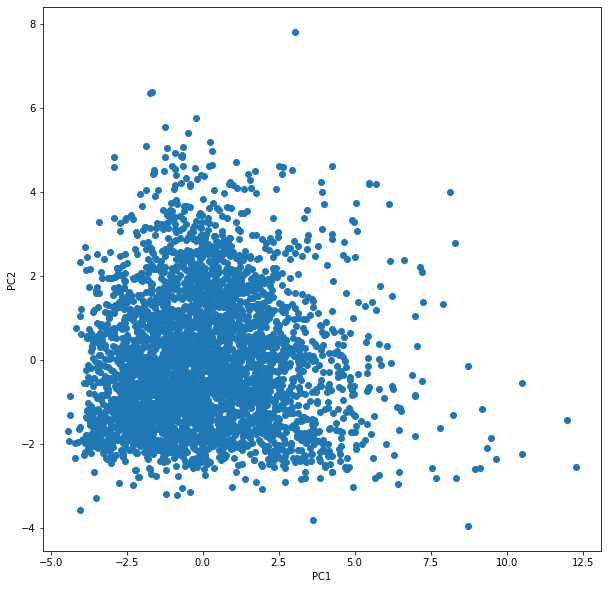

In [549]:
# VISUALIZATION OF RED CORNER
fig, ax = plt.subplots(figsize=(10,10))
xx3=pca3[:,0]
yy3=pca3[:,1]
ax.scatter(xx3,yy3)
plt.xlabel('PC1')
plt.ylabel('PC2');

PCA of Blue Fighters

In [550]:
# PC OF BLUE CORNER
bstats = Blue.loc[:,'fighter':'longest_win_streak']
bstats.drop(bstats.columns[[0, 1, 3, 4]], axis=1, inplace=True)
bstats.drop(bstats.loc[:,'total_rounds_fought':'longest_win_streak'], axis=1, inplace=True)
bstats = bstats[bstats.columns.drop(list(bstats.filter(regex='opp')))]
bstats = bstats[bstats.columns.drop(list(bstats.filter(regex='landed')))]
bstats = bstats[bstats.columns.drop(list(bstats.filter(regex='DISTANCE')))]
bstats = bstats[bstats.columns.drop(list(bstats.filter(regex='GROUND')))]
bstats

,winner,avg_KD,avg_SIG_STR_pct,avg_TD_pct,avg_SUB_ATT,avg_REV,avg_SIG_STR_att,avg_TOTAL_STR_att,avg_TD_att,avg_HEAD_att,avg_BODY_att,avg_LEG_att,avg_CLINCH_att,avg_CTRL_time(seconds),total_time_fought(seconds)
0,0,0.000000,0.420000,0.330000,0.500000,0.000000,50.000000,76.500000,1.500000,39.500000,7.500000,3.000000,10.50000,34.000000,531.50000
1,0,0.500000,0.660000,0.300000,1.500000,0.000000,65.500000,113.500000,2.500000,46.000000,12.000000,7.500000,0.50000,219.500000,577.50000
2,1,0.125000,0.535625,0.185000,0.125000,0.250000,109.187500,170.437500,5.375000,77.375000,31.187500,0.625000,39.06250,390.250000,764.00000
3,1,0.000000,0.515000,0.435000,1.250000,0.000000,86.000000,150.625000,6.375000,60.625000,10.000000,15.375000,3.12500,431.750000,717.87500
4,1,0.046875,0.459277,0.322188,0.189453,0.283203,130.818359,151.554688,2.730469,102.328125,20.951172,7.539062,5.03125,148.507812,809.53125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,0,0.000000,0.737500,1.000000,1.250000,0.000000,37.250000,46.000000,1.000000,24.500000,8.750000,4.000000,9.25000,125.500000,312.75000
3817,0,0.000000,0.500000,0.250000,0.000000,0.000000,62.000000,160.000000,4.000000,49.000000,12.000000,1.000000,6.00000,423.000000,600.00000
3818,0,0.500000,0.640000,0.000000,0.000000,0.000000,17.000000,20.500000,0.000000,9.000000,7.000000,1.000000,14.50000,0.000000,108.50000
3819,0,0.000000,0.460000,1.000000,0.000000,0.000000,98.000000,117.000000,2.000000,47.000000,9.000000,42.000000,36.00000,0.000000,720.00000


In [551]:
scaler=StandardScaler().fit(bstats)
bstats_scaled=scaler.transform(bstats)

In [552]:
pca4 = PCA(2).fit_transform(bstats_scaled)
temp4 =PCA(2).fit(bstats_scaled)

In [553]:
comp = temp.components_
list1 = comp.tolist()
list1

[[6.962771372363853e-05,
  -0.0002752789604664986,
  -4.7223027646291504e-05,
  0.0001543464577900433,
  3.990634919923841e-05,
  0.00013981577711668253,
  0.1292465657193128,
  0.16350974078168115,
  0.004730966843886073,
  0.10065186568942969,
  0.016938940737373308,
  0.011655759292509869,
  0.010612424199921226,
  0.23312070791263215,
  0.9442064877342906,
  -9.503234788086342e-05,
  9.50323478808634e-05],
 [0.0001433877484336754,
  -0.0003532789581871174,
  0.00028293535565264053,
  0.0009291749460781773,
  0.0013503864718823638,
  0.0003787840507592977,
  -0.1684745754246215,
  -0.07538503553511341,
  0.011931073271286318,
  -0.13195304275528608,
  -0.020677743956512066,
  -0.01584378871282343,
  -0.0001286721274066358,
  0.955705440466436,
  -0.18526980815568947,
  -9.79925694720665e-07,
  9.799256947206651e-07]]

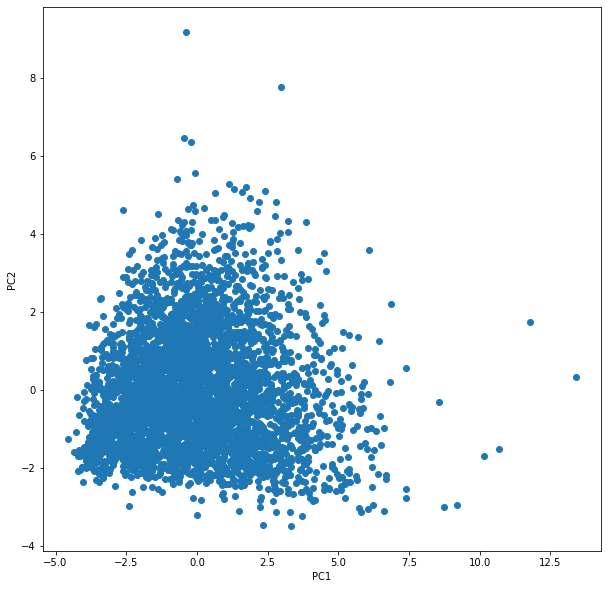

In [554]:
# VISUALIZATION OF BLUE CORNER
fig, ax = plt.subplots(figsize=(10,10))
xx4=pca4[:,0]
yy4=pca4[:,1]
ax.scatter(xx4,yy4)
plt.xlabel('PC1')
plt.ylabel('PC2');

<ipython-input-555-8aeca48e3b67>:11: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


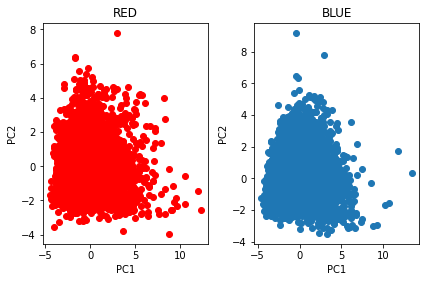

In [555]:
# COMPARISON
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.scatter(xx3, yy3, color = 'r')
ax1.set_title('RED')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2.scatter(xx4, yy4)
plt.title('BLUE')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout(1)
plt.show()

Both corners categorize fighters into grapplers and strikers, but many red fighters tend to lean towards being strikers. In both corners, the winner attribute was more attributed to strikers.

# K MEANS

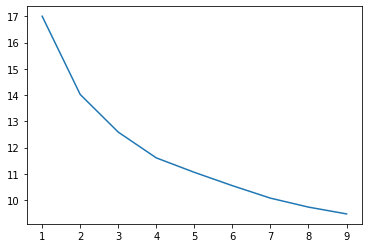

In [556]:
def km_mse(inputs,k):
    mse = []
    for i in range(1,k):
        errors = []
        kmeans = KMeans(n_clusters = i, n_init = 20,random_state = 5).fit(inputs)
        for pt,lab in zip(inputs,kmeans.labels_):
            errors.append(np.linalg.norm(pt-kmeans.cluster_centers_[lab])**2)
        mse.append(np.mean(errors))
    return mse
out = km_mse(stats_scaled,10)
plt.plot(list(range(1,10)),out)

In [557]:
c_kmeans = KMeans(n_clusters=4,n_init=20,random_state=5).fit(stats_scaled)
for i in range(4):
    print(i+1,":",(c_kmeans.labels_==i).sum())

1 : 2133
2 : 1761
3 : 1532
4 : 2216


In [558]:
kmeans = KMeans(n_clusters=5,n_init=20,random_state=5).fit(stats_scaled)
for i in range(5):
    print(i+1,":",(c_kmeans.labels_==i).sum())

1 : 2133
2 : 1761
3 : 1532
4 : 2216
5 : 0


In [559]:
kclusters = c_kmeans.cluster_centers_
kclusters

array([[ 0.26394749,  0.18545027,  0.04427551, -0.18837936, -0.08345768,
        -0.13473006, -0.49641119, -0.58372529, -0.40943834, -0.47344488,
        -0.39831994, -0.2980103 , -0.30185862, -0.40002406, -0.55813912,
        -1.        ,  1.        ],
       [ 0.00511654, -0.09525814, -0.26882102, -0.19385298, -0.32626894,
        -0.16160795,  1.38646984,  1.24635326, -0.03848477,  1.30042594,
         1.13830881,  0.92960816,  0.60892717, -0.22050687,  0.89219018,
         0.00625355, -0.00625355],
       [ 0.14509804, -0.4035272 ,  0.22996744,  0.7632905 ,  0.54125923,
         0.45342975, -0.10690773,  0.26192715,  1.18593853, -0.08341992,
        -0.11639328, -0.13611321,  0.12683066,  1.39917453,  0.61802105,
        -0.06405229,  0.06405229],
       [-0.35765766,  0.17540102,  0.01196682, -0.19145671, -0.03432627,
        -0.05499996, -0.54792187, -0.60720626, -0.39345012, -0.51799948,
        -0.43900317, -0.35642864, -0.27986007, -0.40523159, -0.59658738,
         1.        

In [560]:
Attributes = stats.columns

What kind of fighters are in the UFC?

In [561]:
kmeansdf = pd.DataFrame(kclusters)
kmeansdf = pd.DataFrame.transpose(kmeansdf)
kmeansdf.insert(0, 'Attribute', Attributes)
kmeansdf

,Attribute,0,1,2,3
0,winner,0.263947,0.005117,0.145098,-0.357658
1,avg_KD,0.185450,-0.095258,-0.403527,0.175401
2,avg_SIG_STR_pct,0.044276,-0.268821,0.229967,0.011967
3,avg_TD_pct,-0.188379,-0.193853,0.763290,-0.191457
4,avg_SUB_ATT,-0.083458,-0.326269,0.541259,-0.034326
5,avg_REV,-0.134730,-0.161608,0.453430,-0.055000
6,avg_SIG_STR_att,-0.496411,1.386470,-0.106908,-0.547922
7,avg_TOTAL_STR_att,-0.583725,1.246353,0.261927,-0.607206
8,avg_TD_att,-0.409438,-0.038485,1.185939,-0.393450
9,avg_HEAD_att,-0.473445,1.300426,-0.083420,-0.517999


Interpretation:
<br>
Group 0: Blue corner, biggest losers, grappler, attempts lots of submissions
<br>
Group 1: Blue corner, losers, striker, attempts lots of ineffective strikes
<br>
Group 2: Red corner, best winners, balance of striker and ground fighter
<br>
Group 3: Red corner, winners, balance of striker and ground fighter, hard hitter

# PCA EXPLANATORY POWER

In [562]:
# EXPLANATORY POWER

In [563]:
# DROP CONTROL WINNER, TIME, AND TIME FOUGHT TO INCREASE EXPLANATORY POWER
X=stats.drop(['avg_CTRL_time(seconds)','total_time_fought(seconds)','winner'],axis=1)
y=stats['winner']

In [564]:
scaler = StandardScaler().fit(X)
X_scaled=scaler.transform(X)

In [565]:
pca5 = PCA(5).fit(X_scaled)

In [566]:
components = pca5.components_
components

array([[-0.03773357, -0.06935356, -0.01461882, -0.10112086, -0.03460768,
         0.47761624,  0.46528213,  0.08948975,  0.44788881,  0.39321812,
         0.31944555,  0.26542682, -0.02995461,  0.02995461],
       [ 0.00646828, -0.00622441, -0.01457159,  0.00842186,  0.04243467,
         0.01633512,  0.02188944, -0.03360613,  0.01564531,  0.02319942,
        -0.00258595,  0.05213715,  0.70443316, -0.70443316],
       [-0.37788294,  0.1222331 ,  0.50555746,  0.45533633,  0.34103426,
        -0.04112597,  0.10032408,  0.48077127, -0.03652838, -0.00915344,
        -0.06880829,  0.11827044,  0.00094946, -0.00094946],
       [ 0.39818914,  0.76252113,  0.171111  , -0.06200554, -0.11324368,
        -0.09120874, -0.03905463, -0.01010058, -0.16046906,  0.16304245,
         0.09358639,  0.37807961, -0.00620703,  0.00620703],
       [ 0.24481853,  0.05435762, -0.23266364,  0.41558041,  0.69423853,
         0.0631619 ,  0.03711517, -0.45582512,  0.05500931,  0.09162734,
         0.01976695, -0.00

In [567]:
pca_tr = pca5.transform(X_scaled)
pca5.explained_variance_ratio_
pca5.explained_variance_ratio_[0:5].sum()

0.7228856811298006

In [568]:
X.columns

Index(['avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT', 'avg_REV',
       'avg_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_TD_att', 'avg_HEAD_att',
       'avg_BODY_att', 'avg_LEG_att', 'avg_CLINCH_att', 'corner_Blue',
       'corner_Red'],
      dtype='object')

In [569]:
pca2 = PCA(2).fit(X_scaled)
pca2.explained_variance_ratio_
pca2.explained_variance_ratio_[0:2].sum()

0.43566277978808654

In [570]:
pca2.components_

array([[-0.03773357, -0.06935356, -0.01461882, -0.10112086, -0.03460768,
         0.47761624,  0.46528213,  0.08948975,  0.44788881,  0.39321812,
         0.31944555,  0.26542682, -0.02995461,  0.02995461],
       [ 0.00646828, -0.00622441, -0.01457159,  0.00842186,  0.04243467,
         0.01633512,  0.02188944, -0.03360613,  0.01564531,  0.02319942,
        -0.00258595,  0.05213715,  0.70443316, -0.70443316]])

Text(0, 0.5, 'Explained Variance')

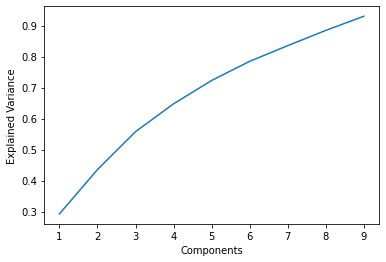

In [571]:
# PLOT OPTIMAL K
evar = []
for i in range(1,10):
    pca = PCA(i).fit(X_scaled)
    pca.explained_variance_ratio_
    nn = pca.explained_variance_ratio_[0:i].sum()
    evar.append(nn)
plt.plot(list(range(1,10)), evar)
plt.xlabel('Components')
plt.ylabel('Explained Variance')

2 principal components only account for 43% of variance in the data, while 5 accounts for 72%. We can use this to analyze the type of fighters in the UFC while minimizing the number of components. However, it is very possible analyze with additional components to achieve a more precise interpretation of fighter types in the UFC. For now, I will use 5.

In [572]:
pcadf = pd.DataFrame(components)
pcadf = pd.DataFrame.transpose(pcadf)
pcadf.insert(0, 'Attribute', X.columns)
pcadf

,Attribute,0,1,2,3,4
0,avg_KD,-0.037734,0.006468,-0.377883,0.398189,0.244819
1,avg_SIG_STR_pct,-0.069354,-0.006224,0.122233,0.762521,0.054358
2,avg_TD_pct,-0.014619,-0.014572,0.505557,0.171111,-0.232664
3,avg_SUB_ATT,-0.101121,0.008422,0.455336,-0.062006,0.415580
4,avg_REV,-0.034608,0.042435,0.341034,-0.113244,0.694239
5,avg_SIG_STR_att,0.477616,0.016335,-0.041126,-0.091209,0.063162
6,avg_TOTAL_STR_att,0.465282,0.021889,0.100324,-0.039055,0.037115
7,avg_TD_att,0.089490,-0.033606,0.480771,-0.010101,-0.455825
8,avg_HEAD_att,0.447889,0.015645,-0.036528,-0.160469,0.055009
9,avg_BODY_att,0.393218,0.023199,-0.009153,0.163042,0.091627


Interpretation:
<br>
Group 0: Red corner, hard hitter, best striker, occasional grappler
<br>
Group 1: Blue corner, some hard hits, infrequent striker, frequent grappler
<br>
Group 2: Blue corner, soft hitter, frequent striker, frequent grappler
<br>
Group 3: Neither corner, soft hitter, infrequent striker, frequent grappler
<br>
Group 4: Red corner, hard hitter, infrequent striker, not grappler

Again, the attribute 'winner' was removed to increase explained variance. However, adding the atrribute in does not change any estimates for any principal component. See below:

In [573]:
Xwinner=stats.drop(['avg_CTRL_time(seconds)','total_time_fought(seconds)'],axis=1)
scaler = StandardScaler().fit(Xwinner)
Xwinner_scaled=scaler.transform(Xwinner)
pca5winner = PCA(5).fit(Xwinner_scaled)
components_with_winner = pca5winner.components_
components_with_winner

array([[ 0.02306197, -0.03763524, -0.06900398, -0.01425367, -0.10087243,
        -0.03473281,  0.47742713,  0.4651101 ,  0.08993093,  0.44771763,
         0.39298595,  0.31937407,  0.26518378, -0.03272991,  0.03272991],
       [-0.30751108,  0.00804808, -0.0216584 , -0.03509642, -0.01017591,
         0.03264435,  0.02172306,  0.02240268, -0.05143107,  0.02066215,
         0.02700807,  0.00197274,  0.04769375,  0.6691219 , -0.6691219 ],
       [ 0.03950128, -0.37445386,  0.12434373,  0.50471278,  0.45513425,
         0.34153225, -0.04079723,  0.10064962,  0.4787583 , -0.03627753,
        -0.0083861 , -0.06884379,  0.1207038 ,  0.03561328, -0.03561328],
       [ 0.08721416,  0.40431047,  0.75757747,  0.16732024, -0.06402979,
        -0.11707176, -0.08949917, -0.03913774, -0.01254699, -0.15770493,
         0.16034812,  0.09282567,  0.3730271 ,  0.0240204 , -0.0240204 ],
       [-0.03384021,  0.24221202,  0.05960222, -0.23175668,  0.41419574,
         0.69425727,  0.06153113,  0.03641918, 

In [574]:
Xwinner.columns

Index(['winner', 'avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT',
       'avg_REV', 'avg_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_TD_att',
       'avg_HEAD_att', 'avg_BODY_att', 'avg_LEG_att', 'avg_CLINCH_att',
       'corner_Blue', 'corner_Red'],
      dtype='object')

# IV. PREDICTIVE ANALYSIS

Can we predict winners?

# LOGISTIC REGRESSION

In [575]:
xstats = stats.drop(columns = 'winner')
xstats = xstats.drop(['avg_CTRL_time(seconds)'], axis = 1)
xstats = xstats.drop(['total_time_fought(seconds)'], axis = 1)
variables = xstats.columns.tolist()
variables = "+".join(variables)
variables

'avg_KD+avg_SIG_STR_pct+avg_TD_pct+avg_SUB_ATT+avg_REV+avg_SIG_STR_att+avg_TOTAL_STR_att+avg_TD_att+avg_HEAD_att+avg_BODY_att+avg_LEG_att+avg_CLINCH_att+corner_Blue+corner_Red'

In [576]:
xlogdata = stats.drop(['avg_CTRL_time(seconds)','total_time_fought(seconds)'],axis = 1)
y = stats['winner']
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(xlogdata,y,test_size = 0.3, random_state = 5)

In [577]:
import statsmodels.formula.api as smf
statstrainlog = smf.logit(formula = 'winner~avg_KD+avg_SIG_STR_pct+avg_TD_pct+avg_SUB_ATT+avg_REV+avg_SIG_STR_att+avg_TOTAL_STR_att+avg_TD_att+avg_HEAD_att+avg_BODY_att+avg_LEG_att+avg_CLINCH_att+corner_Blue+corner_Red',data = Xlog_train).fit()
statstrainlog.summary()

         Current function value: 0.657683
         Iterations: 35


C:\Users\joell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 winner   No. Observations:                 5349
Model:                          Logit   Df Residuals:                     5335
Method:                           MLE   Df Model:                           13
Date:                Wed, 12 May 2021   Pseudo R-squ.:                 0.05116
Time:                        18:20:42   Log-Likelihood:                -3517.9
converged:                      False   LL-Null:                       -3707.6
Covariance Type:            nonrobust   LLR p-value:                 5.024e-73
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4682        nan        nan        nan         nan         nan
avg_KD                0.1019      0.081      1.265      0.206      -0.056       0.260
avg_SIG_STR_pct       0.8814      0.268      3.292      0.001       0.357       1.406
avg_TD_pct            0.1898      0.122      1.558      0.119      -0.049       0.429
avg_SUB_ATT           0.0724      0.045      1.614      0.107      -0.016       0.160
avg_REV              -0.1148      0.096     -1.191      0.234      -0.304       0.074
avg_SIG_STR_att       0.0025   7612.598   3.34e-07      1.000   -1.49e+04    1.49e+04
avg_TOTAL_STR_att    -0.0025      0.002     -1.576      0.115      -0.006       0.001
avg_TD_att            0.0378      0.011      3.329      0.001       0.016       0.060
avg_HEAD_att          0.0026   7612.598   3.36e-07      1.000   -1.49e+04    1.49e+04
avg_BODY_att         -0.0015   7612.598     -2e-07      1.000   -1.49e+04    1.49e+04
avg_LEG_att           0.0016   7612.598   2.09e-07      1.000   -1.49e+04    1.49e+04
avg_CLINCH_att       -0.0031      0.004     -0.713      0.476      -0.012       0.005
corner_Blue          -0.7379        nan        nan        nan         nan         nan
corner_Red            0.2695        nan        nan        nan         nan         nan
=====================================================================================
"""

In [578]:
xstats.columns

Index(['avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT', 'avg_REV',
       'avg_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_TD_att', 'avg_HEAD_att',
       'avg_BODY_att', 'avg_LEG_att', 'avg_CLINCH_att', 'corner_Blue',
       'corner_Red'],
      dtype='object')

<ipython-input-579-1f2f417f3e81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xlog_test['prediction']=statstrainlog.predict(Xlog_test[predictors])


<AxesSubplot:>

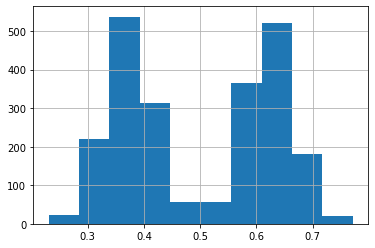

In [579]:
predictors = ['avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT', 'avg_REV',
       'avg_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_TD_att', 'avg_HEAD_att',
       'avg_BODY_att', 'avg_LEG_att', 'avg_CLINCH_att', 'corner_Blue',
       'corner_Red']
Xlog_test['prediction']=statstrainlog.predict(Xlog_test[predictors])
Xlog_test.prediction.hist()

In [580]:
def pred(row):
    if row['prediction']>=0.5:
        return 1
    else:
        return 0
Xlog_test['class']=Xlog_test.apply(pred,axis=1)
Xlog_test['class'].head()

<ipython-input-580-af093982b19b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xlog_test['class']=Xlog_test.apply(pred,axis=1)


2881    1
953     1
2458    1
465     0
1333    1
Name: class, dtype: int64

In [581]:
logtab = pd.crosstab(Xlog_test['class'],Xlog_test['winner'])
logtab

winner,0,1
class,,
0,725,426
1,418,724


In [582]:
fn = logtab.loc[0,1]
fp = logtab.loc[1,0]
tn = logtab.loc[0,0]
tp = logtab.loc[1,1]

In [583]:
# Total test error rate:
Total = (fn+fp+tn+tp)
logerror = (tn+tp)/Total
logerror

0.6319232446576537

In [584]:
# ADD OPPONENT AS PREDICTORS
xstatsall = statsall
variables = xstatsall.columns.tolist()
variables = "+".join(variables)
variables

'winner+avg_KD+avg_opp_KD+avg_SIG_STR_pct+avg_opp_SIG_STR_pct+avg_TD_pct+avg_opp_TD_pct+avg_SUB_ATT+avg_opp_SUB_ATT+avg_REV+avg_opp_REV+avg_SIG_STR_att+avg_opp_SIG_STR_att+avg_TOTAL_STR_att+avg_opp_TOTAL_STR_att+avg_TD_att+avg_opp_TD_att+avg_HEAD_att+avg_opp_HEAD_att+avg_BODY_att+avg_opp_BODY_att+avg_LEG_att+avg_opp_LEG_att+avg_CLINCH_att+avg_opp_CLINCH_att+avg_CTRL_time+avg_opp_CTRL_time+total_time_fought+corner_Blue+corner_Red'

In [585]:
xlogalldata=statsall
y=stats['winner']
Xlogall_train, Xlogall_test, ylogall_train, ylogall_test = train_test_split(xlogalldata,y,test_size=0.3, random_state=5)

In [586]:
statstrainlogall=smf.logit(formula='winner~avg_KD+avg_opp_KD+avg_SIG_STR_pct+avg_opp_SIG_STR_pct+avg_TD_pct+avg_opp_TD_pct+avg_SUB_ATT+avg_opp_SUB_ATT+avg_REV+avg_opp_REV+avg_SIG_STR_att+avg_opp_SIG_STR_att+avg_TOTAL_STR_att+avg_opp_TOTAL_STR_att+avg_TD_att+avg_opp_TD_att+avg_HEAD_att+avg_opp_HEAD_att+avg_BODY_att+avg_opp_BODY_att+avg_LEG_att+avg_opp_LEG_att+avg_CLINCH_att+avg_opp_CLINCH_att+avg_CTRL_time+avg_opp_CTRL_time+total_time_fought+corner_Blue+corner_Red',data=xstatsall).fit()
statstrainlogall.summary()

         Current function value: 0.651602
         Iterations: 35


C:\Users\joell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 winner   No. Observations:                 7642
Model:                          Logit   Df Residuals:                     7613
Method:                           MLE   Df Model:                           28
Date:                Wed, 12 May 2021   Pseudo R-squ.:                 0.05994
Time:                        18:20:43   Log-Likelihood:                -4979.5
converged:                      False   LL-Null:                       -5297.0
Covariance Type:            nonrobust   LLR p-value:                7.269e-116
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0544    1.2e+06  -4.55e-08      1.000   -2.34e+06    2.34e+06
avg_KD                    0.0358      0.070      0.509      0.611      -0.102       0.173
avg_opp_KD               -0.1408      0.083     -1.687      0.092      -0.304       0.023
avg_SIG_STR_pct           0.5521      0.230      2.400      0.016       0.101       1.003
avg_opp_SIG_STR_pct      -0.6391      0.228     -2.806      0.005      -1.085      -0.193
avg_TD_pct                0.0139      0.110      0.127      0.899      -0.201       0.229
avg_opp_TD_pct           -0.1237      0.118     -1.048      0.294      -0.355       0.108
avg_SUB_ATT               0.0878      0.040      2.188      0.029       0.009       0.166
avg_opp_SUB_ATT           0.0164      0.045      0.366      0.714      -0.071       0.104
avg_REV                  -0.1293      0.089     -1.447      0.148      -0.305       0.046
avg_opp_REV               0.0225      0.092      0.243      0.808      -0.159       0.204
avg_SIG_STR_att           0.0050   2.58e+04   1.95e-07      1.000   -5.05e+04    5.05e+04
avg_opp_SIG_STR_att      -0.0022        nan        nan        nan         nan         nan
avg_TOTAL_STR_att        -0.0047      0.002     -2.714      0.007      -0.008      -0.001
avg_opp_TOTAL_STR_att     0.0012      0.002      0.600      0.548      -0.003       0.005
avg_TD_att                0.0490      0.012      3.943      0.000       0.025       0.073
avg_opp_TD_att            0.0534      0.013      4.144      0.000       0.028       0.079
avg_HEAD_att              0.0035   2.58e+04   1.35e-07      1.000   -5.05e+04    5.05e+04
avg_opp_HEAD_att         -0.0038        nan        nan        nan         nan         nan
avg_BODY_att             -0.0011   2.58e+04  -4.43e-08      1.000   -5.05e+04    5.05e+04
avg_opp_BODY_att          0.0007        nan        nan        nan         nan         nan
avg_LEG_att               0.0039   2.58e+04   1.52e-07      1.000   -5.05e+04    5.05e+04
avg_opp_LEG_att           0.0008        nan        nan        nan         nan         nan
avg_CLINCH_att         6.678e-05      0.005      0.015      0.988      -0.009       0.009
avg_opp_CLINCH_att       -0.0097      0.005     -1.956      0.050      -0.019    2.01e-05
avg_CTRL_time             0.0002      0.000      0.447      0.655      -0.001       0.001
avg_opp_CTRL_time        -0.0006      0.000     -1.414      0.157      -0.002       0.000
total_time_fought      6.827e-05      0.000      0.274      0.784      -0.000       0.001
corner_Blue              -0.5487    1.2e+06  -4.59e-07      1.000   -2.34e+06    2.34e+06
corner_Red                0.4967    1.2e+06   4.15e-07      1.000   -2.34e+06    2.34e+06
=========================================================================================
"""

In [587]:
xstatsall.columns

Index(['winner', 'avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct',
       'avg_opp_SIG_STR_pct', 'avg_TD_pct', 'avg_opp_TD_pct', 'avg_SUB_ATT',
       'avg_opp_SUB_ATT', 'avg_REV', 'avg_opp_REV', 'avg_SIG_STR_att',
       'avg_opp_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_opp_TOTAL_STR_att',
       'avg_TD_att', 'avg_opp_TD_att', 'avg_HEAD_att', 'avg_opp_HEAD_att',
       'avg_BODY_att', 'avg_opp_BODY_att', 'avg_LEG_att', 'avg_opp_LEG_att',
       'avg_CLINCH_att', 'avg_opp_CLINCH_att', 'avg_CTRL_time',
       'avg_opp_CTRL_time', 'total_time_fought', 'corner_Blue', 'corner_Red'],
      dtype='object')

<ipython-input-588-92d67aa04f34>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xlogall_test['prediction']=statstrainlogall.predict(Xlogall_test[allpredictors])


<AxesSubplot:>

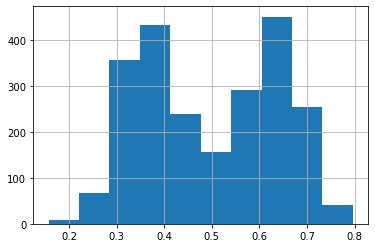

In [588]:
allpredictors = ['winner', 'avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct',
       'avg_opp_SIG_STR_pct', 'avg_TD_pct', 'avg_opp_TD_pct', 'avg_SUB_ATT',
       'avg_opp_SUB_ATT', 'avg_REV', 'avg_opp_REV', 'avg_SIG_STR_att',
       'avg_opp_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_opp_TOTAL_STR_att',
       'avg_TD_att', 'avg_opp_TD_att', 'avg_HEAD_att', 'avg_opp_HEAD_att',
       'avg_BODY_att', 'avg_opp_BODY_att', 'avg_LEG_att', 'avg_opp_LEG_att',
       'avg_CLINCH_att', 'avg_opp_CLINCH_att', 'avg_CTRL_time',
       'avg_opp_CTRL_time', 'total_time_fought', 'corner_Blue', 'corner_Red']
Xlogall_test['prediction']=statstrainlogall.predict(Xlogall_test[allpredictors])
Xlogall_test.prediction.hist()

In [589]:
def pred(row):
    if row['prediction']>=0.5:
        return 1
    else:
        return 0
Xlogall_test['class']=Xlogall_test.apply(pred,axis=1)
Xlogall_test['class'].head()

<ipython-input-589-44459d8994c9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xlogall_test['class']=Xlogall_test.apply(pred,axis=1)


2881    1
953     1
2458    1
465     0
1333    1
Name: class, dtype: int64

In [590]:
logalltab = pd.crosstab(Xlogall_test['class'],Xlogall_test['winner'])
logalltab

winner,0,1
class,,
0,728,426
1,415,724


In [591]:
logallfn = logalltab.loc[0,1]
logallfp = logalltab.loc[1,0]
logalltn = logalltab.loc[0,0]
logalltp = logalltab.loc[1,1]

In [592]:
# Total test error rate:
Total = (logallfn+logallfp+logalltn+logalltp)
logerroropp = (logalltn+logalltp)/Total
logerroropp

0.6332315743567379

# LDA

In [593]:
xlda=stats.drop(['avg_CTRL_time(seconds)','total_time_fought(seconds)','winner'],axis=1)
ylda=stats['winner']
Xlda_train, Xlda_test, ylda_train, ylda_test = train_test_split(xlda,ylda,test_size=0.3, random_state=5)

In [594]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
statslda = LinearDiscriminantAnalysis()
statslda.fit(Xlda_train,ylda_train)
# Add predictions into dataframe
Xlda_test['LDA_Predictions'] = statslda.predict(Xlda_test[['avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT', 'avg_REV',
       'avg_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_TD_att', 'avg_HEAD_att',
       'avg_BODY_att', 'avg_LEG_att', 'avg_CLINCH_att', 'corner_Blue',
       'corner_Red']])
Xlda_test['winner'] = ylda_test
ldatab = pd.crosstab(Xlda_test['LDA_Predictions'],Xlda_test['winner'])
ldatab

<ipython-input-594-7d937a600667>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xlda_test['LDA_Predictions'] = statslda.predict(Xlda_test[['avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT', 'avg_REV',
<ipython-input-594-7d937a600667>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xlda_test['winner'] = ylda_test


winner,0,1
LDA_Predictions,,
0,725,425
1,418,725


In [595]:
ldafn = ldatab.loc[0,1]
ldafp = ldatab.loc[1,0]
ldatn = ldatab.loc[0,0]
ldatp = ldatab.loc[1,1]

In [596]:
# Total test error rate:
Total = (ldafn+ldafp+ldatn+ldatp)
ldaerror = (ldatn+ldatp)/Total
ldaerror

0.6323593545573485

In [597]:
# ADD OPPONENT AS PREDICTORS

In [598]:
xalllda=statsall.drop(['avg_CTRL_time','total_time_fought','winner'],axis=1)
yalllda=statsall['winner']
Xalllda_train, Xalllda_test, yalllda_train, yalllda_test = train_test_split(xalllda,yalllda,test_size = 0.3, random_state = 5)

In [599]:
xalllda.columns

Index(['avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct', 'avg_opp_SIG_STR_pct',
       'avg_TD_pct', 'avg_opp_TD_pct', 'avg_SUB_ATT', 'avg_opp_SUB_ATT',
       'avg_REV', 'avg_opp_REV', 'avg_SIG_STR_att', 'avg_opp_SIG_STR_att',
       'avg_TOTAL_STR_att', 'avg_opp_TOTAL_STR_att', 'avg_TD_att',
       'avg_opp_TD_att', 'avg_HEAD_att', 'avg_opp_HEAD_att', 'avg_BODY_att',
       'avg_opp_BODY_att', 'avg_LEG_att', 'avg_opp_LEG_att', 'avg_CLINCH_att',
       'avg_opp_CLINCH_att', 'avg_opp_CTRL_time', 'corner_Blue', 'corner_Red'],
      dtype='object')

In [600]:
statslda2 = LinearDiscriminantAnalysis()
statslda2.fit(Xalllda_train,yalllda_train)
# Add predictions into dataframe
Xalllda_test['LDA_Predictions'] = statslda2.predict(Xalllda_test[['avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct', 'avg_opp_SIG_STR_pct',
       'avg_TD_pct', 'avg_opp_TD_pct', 'avg_SUB_ATT', 'avg_opp_SUB_ATT',
       'avg_REV', 'avg_opp_REV', 'avg_SIG_STR_att', 'avg_opp_SIG_STR_att',
       'avg_TOTAL_STR_att', 'avg_opp_TOTAL_STR_att', 'avg_TD_att',
       'avg_opp_TD_att', 'avg_HEAD_att', 'avg_opp_HEAD_att', 'avg_BODY_att',
       'avg_opp_BODY_att', 'avg_LEG_att', 'avg_opp_LEG_att', 'avg_CLINCH_att',
       'avg_opp_CLINCH_att', 'avg_opp_CTRL_time', 'corner_Blue', 'corner_Red']])
Xalllda_test['winner'] = yalllda_test
ldatab2 = pd.crosstab(Xalllda_test['LDA_Predictions'],Xalllda_test['winner'])
ldatab2

<ipython-input-600-d5730fba72e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xalllda_test['LDA_Predictions'] = statslda2.predict(Xalllda_test[['avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct', 'avg_opp_SIG_STR_pct',
<ipython-input-600-d5730fba72e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xalllda_test['winner'] = yalllda_test


winner,0,1
LDA_Predictions,,
0,726,430
1,417,720


In [601]:
ldaallfn = ldatab2.loc[0,1]
ldaallfp = ldatab2.loc[1,0]
ldaalltn = ldatab2.loc[0,0]
ldaalltp = ldatab2.loc[1,1]

In [602]:
# Total test error rate:
Total = (ldaallfn+ldaallfp+ldaalltn+ldaalltp)
ldaerroropp = (ldaalltn+ldaalltp)/Total
ldaerroropp

0.6306149149585696

# QDA

In [603]:
xqda=stats.drop(['avg_CTRL_time(seconds)','total_time_fought(seconds)','winner'],axis=1)
yqda=stats['winner']
Xqda_train, Xqda_test, yqda_train, yqda_test = train_test_split(xqda,yqda,test_size=0.3, random_state=5)

In [604]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
statsqda = QuadraticDiscriminantAnalysis()
statsqda.fit(Xqda_train,yqda_train)
# Add predictions into dataframe
Xqda_test['QDA_Predictions'] = statsqda.predict(Xqda_test[['avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT', 'avg_REV',
       'avg_SIG_STR_att', 'avg_TOTAL_STR_att', 'avg_TD_att', 'avg_HEAD_att',
       'avg_BODY_att', 'avg_LEG_att', 'avg_CLINCH_att', 'corner_Blue',
       'corner_Red']])
Xqda_test['winner'] = yqda_test
qdatab = pd.crosstab(Xqda_test['QDA_Predictions'],Xqda_test['winner'])
qdatab


C:\Users\joell\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
<ipython-input-604-eface18b4d27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xqda_test['QDA_Predictions'] = statsqda.predict(Xqda_test[['avg_KD', 'avg_SIG_STR_pct', 'avg_TD_pct', 'avg_SUB_ATT', 'avg_REV',
<ipython-input-604-eface18b4d27>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xqda_test['winner'] = yqda_test


winner,0,1
QDA_Predictions,,
0,574,445
1,569,705


In [605]:
qdafn = qdatab.loc[0,1]
qdafp = qdatab.loc[1,0]
qdatn = qdatab.loc[0,0]
qdatp = qdatab.loc[1,1]

In [606]:
# Total test error rate:
Total = (qdafn+qdafp+qdatn+qdatp)
qdaerror = (qdatn+qdatp)/Total
qdaerror

0.5577845617095508

In [607]:
# ADD OPPONENT AS PREDICTORS

In [608]:
xallqda=statsall.drop(['avg_CTRL_time','total_time_fought','winner'],axis=1)
yallqda=statsall['winner']
Xallqda_train, Xallqda_test, yallqda_train, yallqda_test = train_test_split(xallqda,yallqda,test_size = 0.3, random_state = 5)

In [609]:
xallqda.columns

Index(['avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct', 'avg_opp_SIG_STR_pct',
       'avg_TD_pct', 'avg_opp_TD_pct', 'avg_SUB_ATT', 'avg_opp_SUB_ATT',
       'avg_REV', 'avg_opp_REV', 'avg_SIG_STR_att', 'avg_opp_SIG_STR_att',
       'avg_TOTAL_STR_att', 'avg_opp_TOTAL_STR_att', 'avg_TD_att',
       'avg_opp_TD_att', 'avg_HEAD_att', 'avg_opp_HEAD_att', 'avg_BODY_att',
       'avg_opp_BODY_att', 'avg_LEG_att', 'avg_opp_LEG_att', 'avg_CLINCH_att',
       'avg_opp_CLINCH_att', 'avg_opp_CTRL_time', 'corner_Blue', 'corner_Red'],
      dtype='object')

In [610]:
statsqda2 = QuadraticDiscriminantAnalysis()
statsqda2.fit(Xallqda_train,yallqda_train)
# Add predictions into dataframe
Xallqda_test['QDA_Predictions'] = statsqda2.predict(Xallqda_test[['avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct', 'avg_opp_SIG_STR_pct',
       'avg_TD_pct', 'avg_opp_TD_pct', 'avg_SUB_ATT', 'avg_opp_SUB_ATT',
       'avg_REV', 'avg_opp_REV', 'avg_SIG_STR_att', 'avg_opp_SIG_STR_att',
       'avg_TOTAL_STR_att', 'avg_opp_TOTAL_STR_att', 'avg_TD_att',
       'avg_opp_TD_att', 'avg_HEAD_att', 'avg_opp_HEAD_att', 'avg_BODY_att',
       'avg_opp_BODY_att', 'avg_LEG_att', 'avg_opp_LEG_att', 'avg_CLINCH_att',
       'avg_opp_CLINCH_att', 'avg_opp_CTRL_time', 'corner_Blue', 'corner_Red']])
Xallqda_test['winner'] = yallqda_test
qdatab2 = pd.crosstab(Xallqda_test['QDA_Predictions'],Xallqda_test['winner'])
qdatab2

C:\Users\joell\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
<ipython-input-610-ae6691f6cd2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xallqda_test['QDA_Predictions'] = statsqda2.predict(Xallqda_test[['avg_KD', 'avg_opp_KD', 'avg_SIG_STR_pct', 'avg_opp_SIG_STR_pct',
<ipython-input-610-ae6691f6cd2d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xallqda_test['winner'] = yallqda_test


winner,0,1
QDA_Predictions,,
0,587,384
1,556,766


In [611]:
qdaallfn = qdatab2.loc[0,1]
qdaallfp = qdatab2.loc[1,0]
qdaalltn = qdatab2.loc[0,0]
qdaalltp = qdatab2.loc[1,1]

In [612]:
# Total test error rate:
Total = (qdaallfn+qdaallfp+qdaalltn+qdaalltp)
qdaerroropp = (qdaalltn+qdaalltp)/Total
qdaerroropp

0.5900566942869603

# KNN

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state = 5)

In [614]:
# CREATE CLASSIFIER USING K
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)
nb1 = clf.fit(X_train,y_train)
print(np.mean(X_train,axis = 0),np.std(X_train,axis=0))

[-0.0009981  -0.00255035 -0.01465304  0.00959218  0.00441235  0.00893501
  0.00405989 -0.00641743  0.00648411  0.00844621  0.01575164  0.00564427
 -0.00243036  0.00243036] [0.99734277 0.98082825 0.99534519 1.03071613 1.0048569  0.99904266
 0.99896946 0.9958651  0.99834686 0.99823874 1.0181283  0.99617533
 0.99999705 0.99999705]


Text(0, 0.5, 'Accuracy')

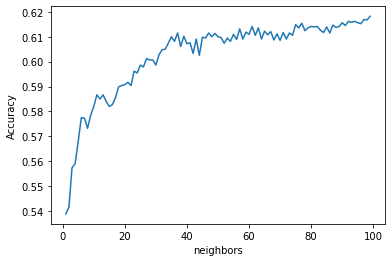

In [615]:
# PLOT OPTIMAL K
cvres = []
for i in range(1,100):
    clf = KNeighborsClassifier(n_neighbors = i)
    nn = cross_validate(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cvres.append(nn['test_score'].mean())
plt.plot(list(range(1,100)),cvres)
plt.xlabel('neighbors')
plt.ylabel('Accuracy')

In [616]:
np.argmax(cvres)

98

In [617]:
# USE OPTIMAL K
mod = KNeighborsClassifier(n_neighbors = 99)
nb99 = mod.fit(X_train,y_train)

In [618]:
# PREDICT ACCURACY ON TEST SET
from sklearn.metrics import accuracy_score
knnacc = accuracy_score(nb99.predict(X_test),y_test)
knnacc

0.6297426951591801

In [619]:
# ADD OPPONENT AS PREDICTORS

In [620]:
Xall = statsall.drop(['avg_CTRL_time','total_time_fought','winner'],axis=1)
yall = statsall['winner']

In [621]:
scaler = StandardScaler().fit(Xall)
Xall_scaled = scaler.transform(Xall)

In [622]:
Xall_train, Xall_test, yall_train, yall_test = train_test_split(Xall_scaled,yall,test_size = 0.3, random_state = 5)

In [623]:
# CREATE CLASSIFIER USING K
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)
nb1 = clf.fit(Xall_train,yall_train)
print(np.mean(Xall_train,axis = 0),np.std(Xall_train,axis=0))

[-0.0009981  -0.0117781  -0.00255035 -0.00383745 -0.01465304  0.01057136
  0.00959218 -0.00499603  0.00441235 -0.00865573  0.00893501  0.01174632
  0.00405989  0.01210634 -0.00641743  0.01859241  0.00648411  0.01248913
  0.00844621  0.0025509   0.01575164  0.00836555  0.00564427  0.00809607
  0.01875466 -0.00243036  0.00243036] [0.99734277 0.98479204 0.98082825 0.997858   0.99534519 1.00138882
 1.03071613 0.97852371 1.0048569  0.98175398 0.99904266 0.99359707
 0.99896946 0.99584895 0.9958651  1.00380115 0.99834686 0.99538403
 0.99823874 0.98520864 1.0181283  0.99974749 0.99617533 1.01326609
 1.01131911 0.99999705 0.99999705]


Text(0, 0.5, 'Accuracy')

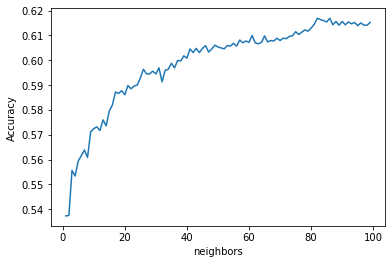

In [624]:
# PLOT OPTIMAL K
cvres = []
for i in range(1,100):
    clf = KNeighborsClassifier(n_neighbors = i)
    nn = cross_validate(clf, Xall_train, yall_train, cv = 5, scoring = 'accuracy')
    cvres.append(nn['test_score'].mean())
plt.plot(list(range(1,100)),cvres)
plt.xlabel('neighbors')
plt.ylabel('Accuracy')

In [625]:
np.argmax(cvres)

81

In [626]:
# USE OPTIMAL K
mod = KNeighborsClassifier(n_neighbors = 82)
nb82 = mod.fit(Xall_train,yall_train)

In [627]:
# PREDICT ACCURACY ON TEST SET
knnaccopp = accuracy_score(nb82.predict(Xall_test),yall_test)
knnaccopp

0.6227649367640645

# RANDOM FOREST

In [628]:
# FIND OPTIMAL NUMBER OF TREES
num_trees = [ 100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950,
       1000]
num_trees

[100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950,
 1000]

In [629]:
from tqdm import tqdm
cvres=[]
for num in tqdm(num_trees):
    rf_cv_clf = RandomForestClassifier(n_estimators = num, max_features = 'sqrt',max_depth = 5,random_state=5)
    cvclf = cross_validate(rf_cv_clf, X_train, y_train, cv = 5, scoring = 'f1')
    cvres.append(cvclf['test_score'].mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [04:02<00:00, 12.78s/it]


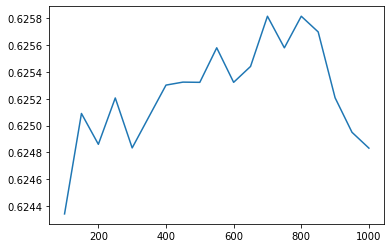

In [630]:
plt.plot(num_trees,cvres)

In [631]:
possible_k = cvres[0:700]
max(possible_k)

0.6258159886560348

In [632]:
np.argmax(cvres)

12

In [633]:
num_trees[9]

550

In [634]:
rf = RandomForestClassifier(n_estimators = 550,max_features = 'sqrt',random_state = 5).fit(X_train,y_train)

In [635]:
from sklearn.metrics import accuracy_score
rfacc = accuracy_score(rf.predict(X_test),y_test).round(3)
rfacc

0.623

In [636]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1143
           1       0.62      0.64      0.63      1150

    accuracy                           0.62      2293
   macro avg       0.62      0.62      0.62      2293
weighted avg       0.62      0.62      0.62      2293



In [637]:
# ADD OPPONENT AS PREDICTORS

In [638]:
cvres = []
for num in tqdm(num_trees):
    rf_cv_clf = RandomForestClassifier(n_estimators = num, max_features = 'sqrt',max_depth = 5,random_state = 5)
    cvclf = cross_validate(rf_cv_clf, Xall_train, yall_train, cv = 5, scoring = 'f1')
    cvres.append(cvclf['test_score'].mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [05:04<00:00, 16.02s/it]


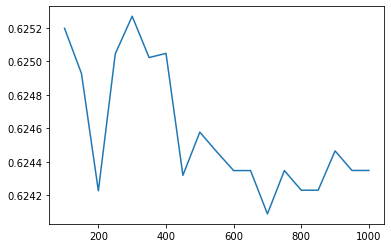

In [639]:
plt.plot(num_trees,cvres)

In [640]:
num_trees[9]

550

In [641]:
rfall = RandomForestClassifier(n_estimators = 550,max_features = 'sqrt',random_state = 5).fit(Xall_train,yall_train)

In [642]:
rfaccopp = accuracy_score(rfall.predict(Xall_test),yall_test).round(3)
rfaccopp

0.628

In [643]:
print(classification_report(yall_test,rfall.predict(Xall_test)))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1143
           1       0.63      0.62      0.63      1150

    accuracy                           0.63      2293
   macro avg       0.63      0.63      0.63      2293
weighted avg       0.63      0.63      0.63      2293



# CONCLUSION

In [644]:
ModelError = ['LogReg','LogReg*','LDA','LDA*','QDA', 'QDA*']
ModelAcc = ['KNN','KNN*','RF','RF*']
Errors = [logerror, logerroropp, ldaerror, ldaerroropp, qdaerror, qdaerroropp]
Acc = [knnacc, knnaccopp, rfacc, rfaccopp]
errordata = [ModelError, Errors]
accdata = [ModelAcc, Acc]

In [645]:
errorsummary = pd.DataFrame(data = errordata)
errorsummary = errorsummary.transpose()
errorsummary

,0,1
0,LogReg,0.631923
1,LogReg*,0.633232
2,LDA,0.632359
3,LDA*,0.630615
4,QDA,0.557785
5,QDA*,0.590057


In [646]:
accsummary = pd.DataFrame(data = accdata)
accsummary = accsummary.transpose()
accsummary

,0,1
0,KNN,0.629743
1,KNN*,0.622765
2,RF,0.623
3,RF*,0.628


*Denotes models where opponents' statistics were incorporated into the model.

Based on test error rate, the best model to predict wins based on the given UFC fight statistics was the Logistic Regression Model that also incorporated the opponents' statistics. This model was only an edge up from the original Logistic Regression Model that did not incoporate opponent statistics. Based on accuracy, the best model to predict win was the K-Nearest Neighbors Model that did not incorporate opponents' statistics, which was only marginally better than the original K-Nearest Neighbors Model that did incorporate opponent statistics.